In [15]:
import os
import numpy as np
import pandas as pd
import onnxruntime as ort

# Load Model    

In [16]:
modelPath = "fitmotion_model.onnx"
sess = ort.InferenceSession(modelPath)

# Loading The Data

In [17]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [18]:
# Load testing data
data_url = '/ups4_sub6_cut.csv'
df = pd.read_csv('testing_data' + data_url)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-0.026089,-1.243977,-1.944829,-0.008374,0.947068,-0.320918,1.969064,-0.393401,0.025026,-0.195376,-0.413300,0.117412
1,-0.016212,-1.210227,-1.933195,-0.005719,0.935696,-0.352756,1.520257,0.112341,0.213523,-0.073611,-0.338116,0.151691
2,-0.003704,-1.185899,-1.924287,-0.001391,0.926837,-0.375457,1.043454,0.266757,0.106377,-0.078107,-0.348559,0.274673
3,0.004480,-1.169426,-1.920961,0.001750,0.920526,-0.390673,0.716955,0.224363,0.068900,-0.039028,-0.326059,0.299120
4,0.009567,-1.157606,-1.917640,0.003841,0.915844,-0.401512,0.517690,0.019546,0.046406,-0.067318,-0.366696,0.287544
...,...,...,...,...,...,...,...,...,...,...,...,...
1657,-1.185104,-1.520296,-2.034214,-0.046699,0.998725,-0.018961,-0.671993,-0.162729,-0.467283,-0.068200,-0.088920,0.087793
1658,-1.597080,-1.514451,-2.443033,-0.056226,0.998413,0.001478,-1.155171,-0.163064,-0.497363,-0.091586,0.136810,0.418383
1659,-1.932478,-1.497771,-2.782355,-0.068190,0.997335,0.025798,-1.239629,0.339663,-0.669513,-0.164202,0.525721,0.213765
1660,-2.135427,-1.473122,-2.991423,-0.082348,0.995234,0.052161,-1.426064,0.160291,-0.672721,-0.022357,0.900167,0.269937


# Preprocessing Data

In [19]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [20]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

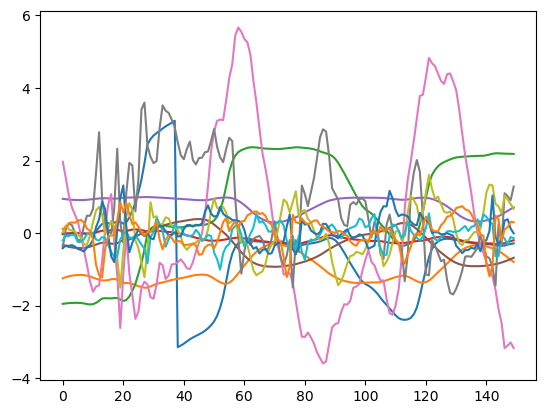

In [21]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

# Prediction

In [22]:
# Predict with ONNX
tx = tx.astype(np.float32)
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name
y_pred_onnx = sess.run([output_name], {input_name: tx})[0]
y_pred_onnx = np.argmax(y_pred_onnx, axis=1)
y_pred_onnx = mode(y_pred_onnx)[0]
labels[y_pred_onnx]

'ups'

: 